#GRIP: The Sparks Foundation

#Data Science and Business Analytics Internship

#Author: Prerna Kumari

#Task4: Perform Exploratory Data Analysis on dataset 'Global Terrorism'

Dataset: https://bit.ly/2TK5Xn5

In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
gt = pd.read_csv('/content/global-terrorism.csv',encoding='ISO-8859-1')
gt.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [ ]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
gt.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
# Here I just take important data in whole dataset those I'm using further processing.

gt = gt[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
# Checking the null velues in data

gt.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4530
longitude        4531
AttackType          0
Killed           9895
Wounded         15624
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         1
Motive         124700
dtype: int64

In [ ]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173896 entries, 0 to 173895
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         173896 non-null  int64  
 1   Month        173896 non-null  int64  
 2   Day          173896 non-null  int64  
 3   Country      173896 non-null  object 
 4   state        173475 non-null  object 
 5   Region       173896 non-null  object 
 6   city         173462 non-null  object 
 7   latitude     169366 non-null  float64
 8   longitude    169365 non-null  float64
 9   AttackType   173896 non-null  object 
 10  Killed       164001 non-null  float64
 11  Wounded      158272 non-null  float64
 12  Target       173260 non-null  object 
 13  Summary      107767 non-null  object 
 14  Group        173896 non-null  object 
 15  Target_type  173896 non-null  object 
 16  Weapon_type  173895 non-null  object 
 17  Motive       49196 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
print("Country with the most attacks:",gt['Country'].value_counts().idxmax())
print("City with the most attacks:",gt['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",gt['Region'].value_counts().idxmax())
print("Year with the most attacks:",gt['Year'].value_counts().idxmax())
print("Month with the most attacks:",gt['Month'].value_counts().idxmax())
print("Group with the most attacks:",gt['Group'].value_counts().index[1])
print("Most Attack Types:",gt['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


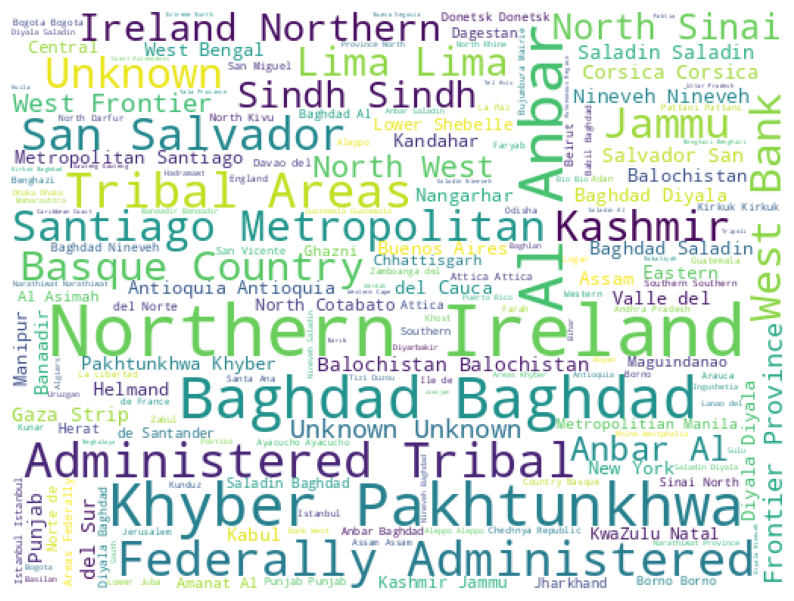

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = gt.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
gt['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017     3105
Name: Year, dtype: int64

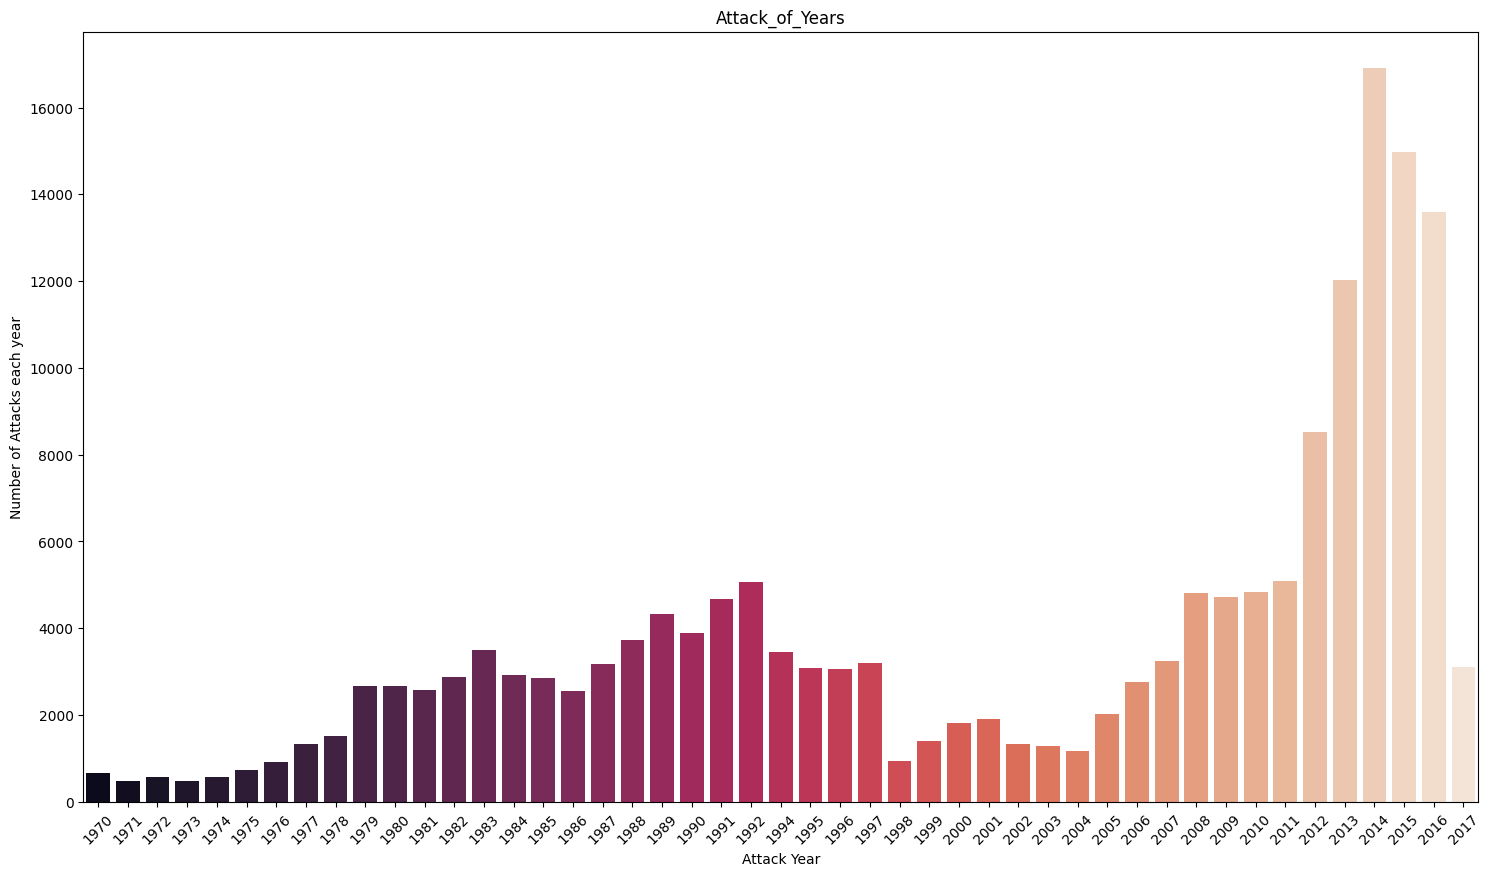

In [ ]:
#DATA VISUALISATION
#Number of Terrorist Activities each Year#
x_year = gt['Year'].unique()
y_count_years = gt['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()


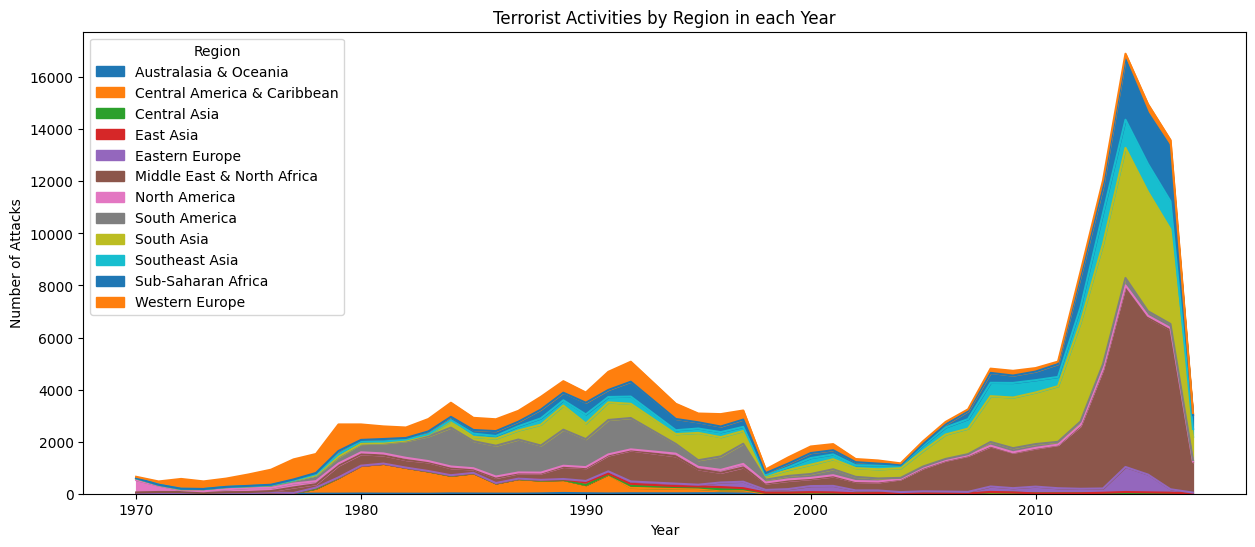

In [ ]:
#Terrorist Activities by Region in each Year through Area Plot
pd.crosstab(gt.Year, gt.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
gt['Wounded'] = gt['Wounded'].fillna(0).astype(int)
gt['Killed'] = gt['Killed'].fillna(0).astype(int)
gt['casualities'] = gt['Killed'] + gt['Wounded']

In [ ]:
gt1 = gt.sort_values(by='casualities',ascending=False)[:40]

In [ ]:
heat=gt1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat.head()

Year         1982  1984  1987   1992  1994  1995  1996  1997  1998  2001  \
Country                                                                    
Afghanistan   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Chad          0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Ethiopia      0.0   0.0   0.0  500.0   0.0   0.0   0.0   0.0   0.0   0.0   
France        0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
India         0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year         2004  2005    2006  2007    2008  2009  2014   2015   2016  
Country                                                                  
Afghanistan   0.0   0.0     0.0   0.0     0.0   0.0   0.0  536.0    0.0  
Chad          0.0   0.0     0.0   0.0  1161.0   0.0   0.0    0.0    0.0  
Ethiopia      0.0   0.0     0.0   0.0     0.0   0.0   0.0    0.0    0.0  
France        0.0   0.0     0.0   0.0     0.0   0.0   0.0    0.0  520.0  
India         0.0   0.0  1005.0   0.0     0.0   0.0   0.0    0.0    0.0

In [ ]:
gt.Country.value_counts()[:15]

Iraq              22929
Pakistan          13877
Afghanistan       11658
India             11273
Colombia           8227
Philippines        6421
Peru               6093
El Salvador        5320
United Kingdom     5145
Turkey             4141
Thailand           3743
Somalia            3723
Nigeria            3544
Spain              3245
Yemen              3180
Name: Country, dtype: int64

#ANALYSIS ON CUSTOMIZED DATA

#Terrorist Attacks of a Particular year and their Locations

In [ ]:
#Let's look at the terrorist acts in the world over a certain year.
import folium
from folium.plugins import MarkerCluster
filterYear = gt['Year'] == 1980

In [ ]:
filterData = gt[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

About 20% of the incidents occurred in Latin America and another 20% in the Middle East. , Of the 5,955 international terrorist incidents recorded between 1968 and 1979, 673 incidents (II percent) involved deaths and 867 (15 percent) involved injuries. These proportions are up sliahtly in 1980.

Now let's check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [ ]:
gt.Group.value_counts()[1:15]

Taliban                                             6775
Islamic State of Iraq and the Levant (ISIL)         4736
Shining Path (SL)                                   4553
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          2872
Irish Republican Army (IRA)                         2671
New People's Army (NPA)                             2522
Revolutionary Armed Forces of Colombia (FARC)       2487
Kurdistan Workers' Party (PKK)                      2173
Boko Haram                                          2152
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1813
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1526
Name: Group, dtype: int64

In [ ]:
test = gt[gt.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [ ]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia'], dtype=object)

In [ ]:
gt_df_group = gt.dropna(subset=['latitude','longitude'])
gt_df_group = gt_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = gt.Group.value_counts()[1:8].index.tolist()
gt_df_group = gt_df_group.loc[gt_df_group.Group.isin(terrorist_groups)]
print(gt_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [ ]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(gt_df_group)):
    folium.Marker([gt_df_group.iloc[i]['latitude'],gt_df_group.iloc[i]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(gt_df_group.iloc[i]['Group'],
                  gt_df_group.iloc[i]['Country'])).add_to(map)
map

The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive.

In [ ]:
gt.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0       1        0             Julio Guzman     NaN   
1       0        0  Nadine Chaval, daughter     NaN   
2       1        0                 Employee     NaN   
3       0        0             U.S. Embassy     NaN   
4       0        0           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN            1  
1     Unknown    NaN            0  
2     Unknown    NaN            1  
3  Explosives    NaN            0  
4  Incendiary    NaN            0

In [ ]:
# Total Number of people killed in terror attack

killData = gt.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 393109


In [ ]:
# Let's look at what types of attacks these deaths were made of.

attackData = gt.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillData.head()

AttackType  Killed
0                   Assassination       1
1     Hostage Taking (Kidnapping)       0
2                   Assassination       1
3               Bombing/Explosion       0
4  Facility/Infrastructure Attack       0

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed             155444          24308             149104   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                                3552       3708   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                     3903                        22518   

AttackType  Unarmed Assault  Unknown  
Killed                  842    29730

In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

In [ ]:
#Number of Killed in Terrorist Attacks by Countries

countryData = gt.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Killed         34482       42    11056        0    3040                    0   

Country  Argentina  Armenia  Australia  Austria  ...  Vietnam  \
Killed         490       37         20       28  ...        1   

Country  Wallis and Futuna  West Bank and Gaza Strip  West Germany (FRG)  \
Killed                   0                      1467                  97   

Country  Western Sahara  Yemen  Yugoslavia  Zaire  Zambia  Zimbabwe  
Killed                1   8269         119    324      70       154  

[1 rows x 205 columns]

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

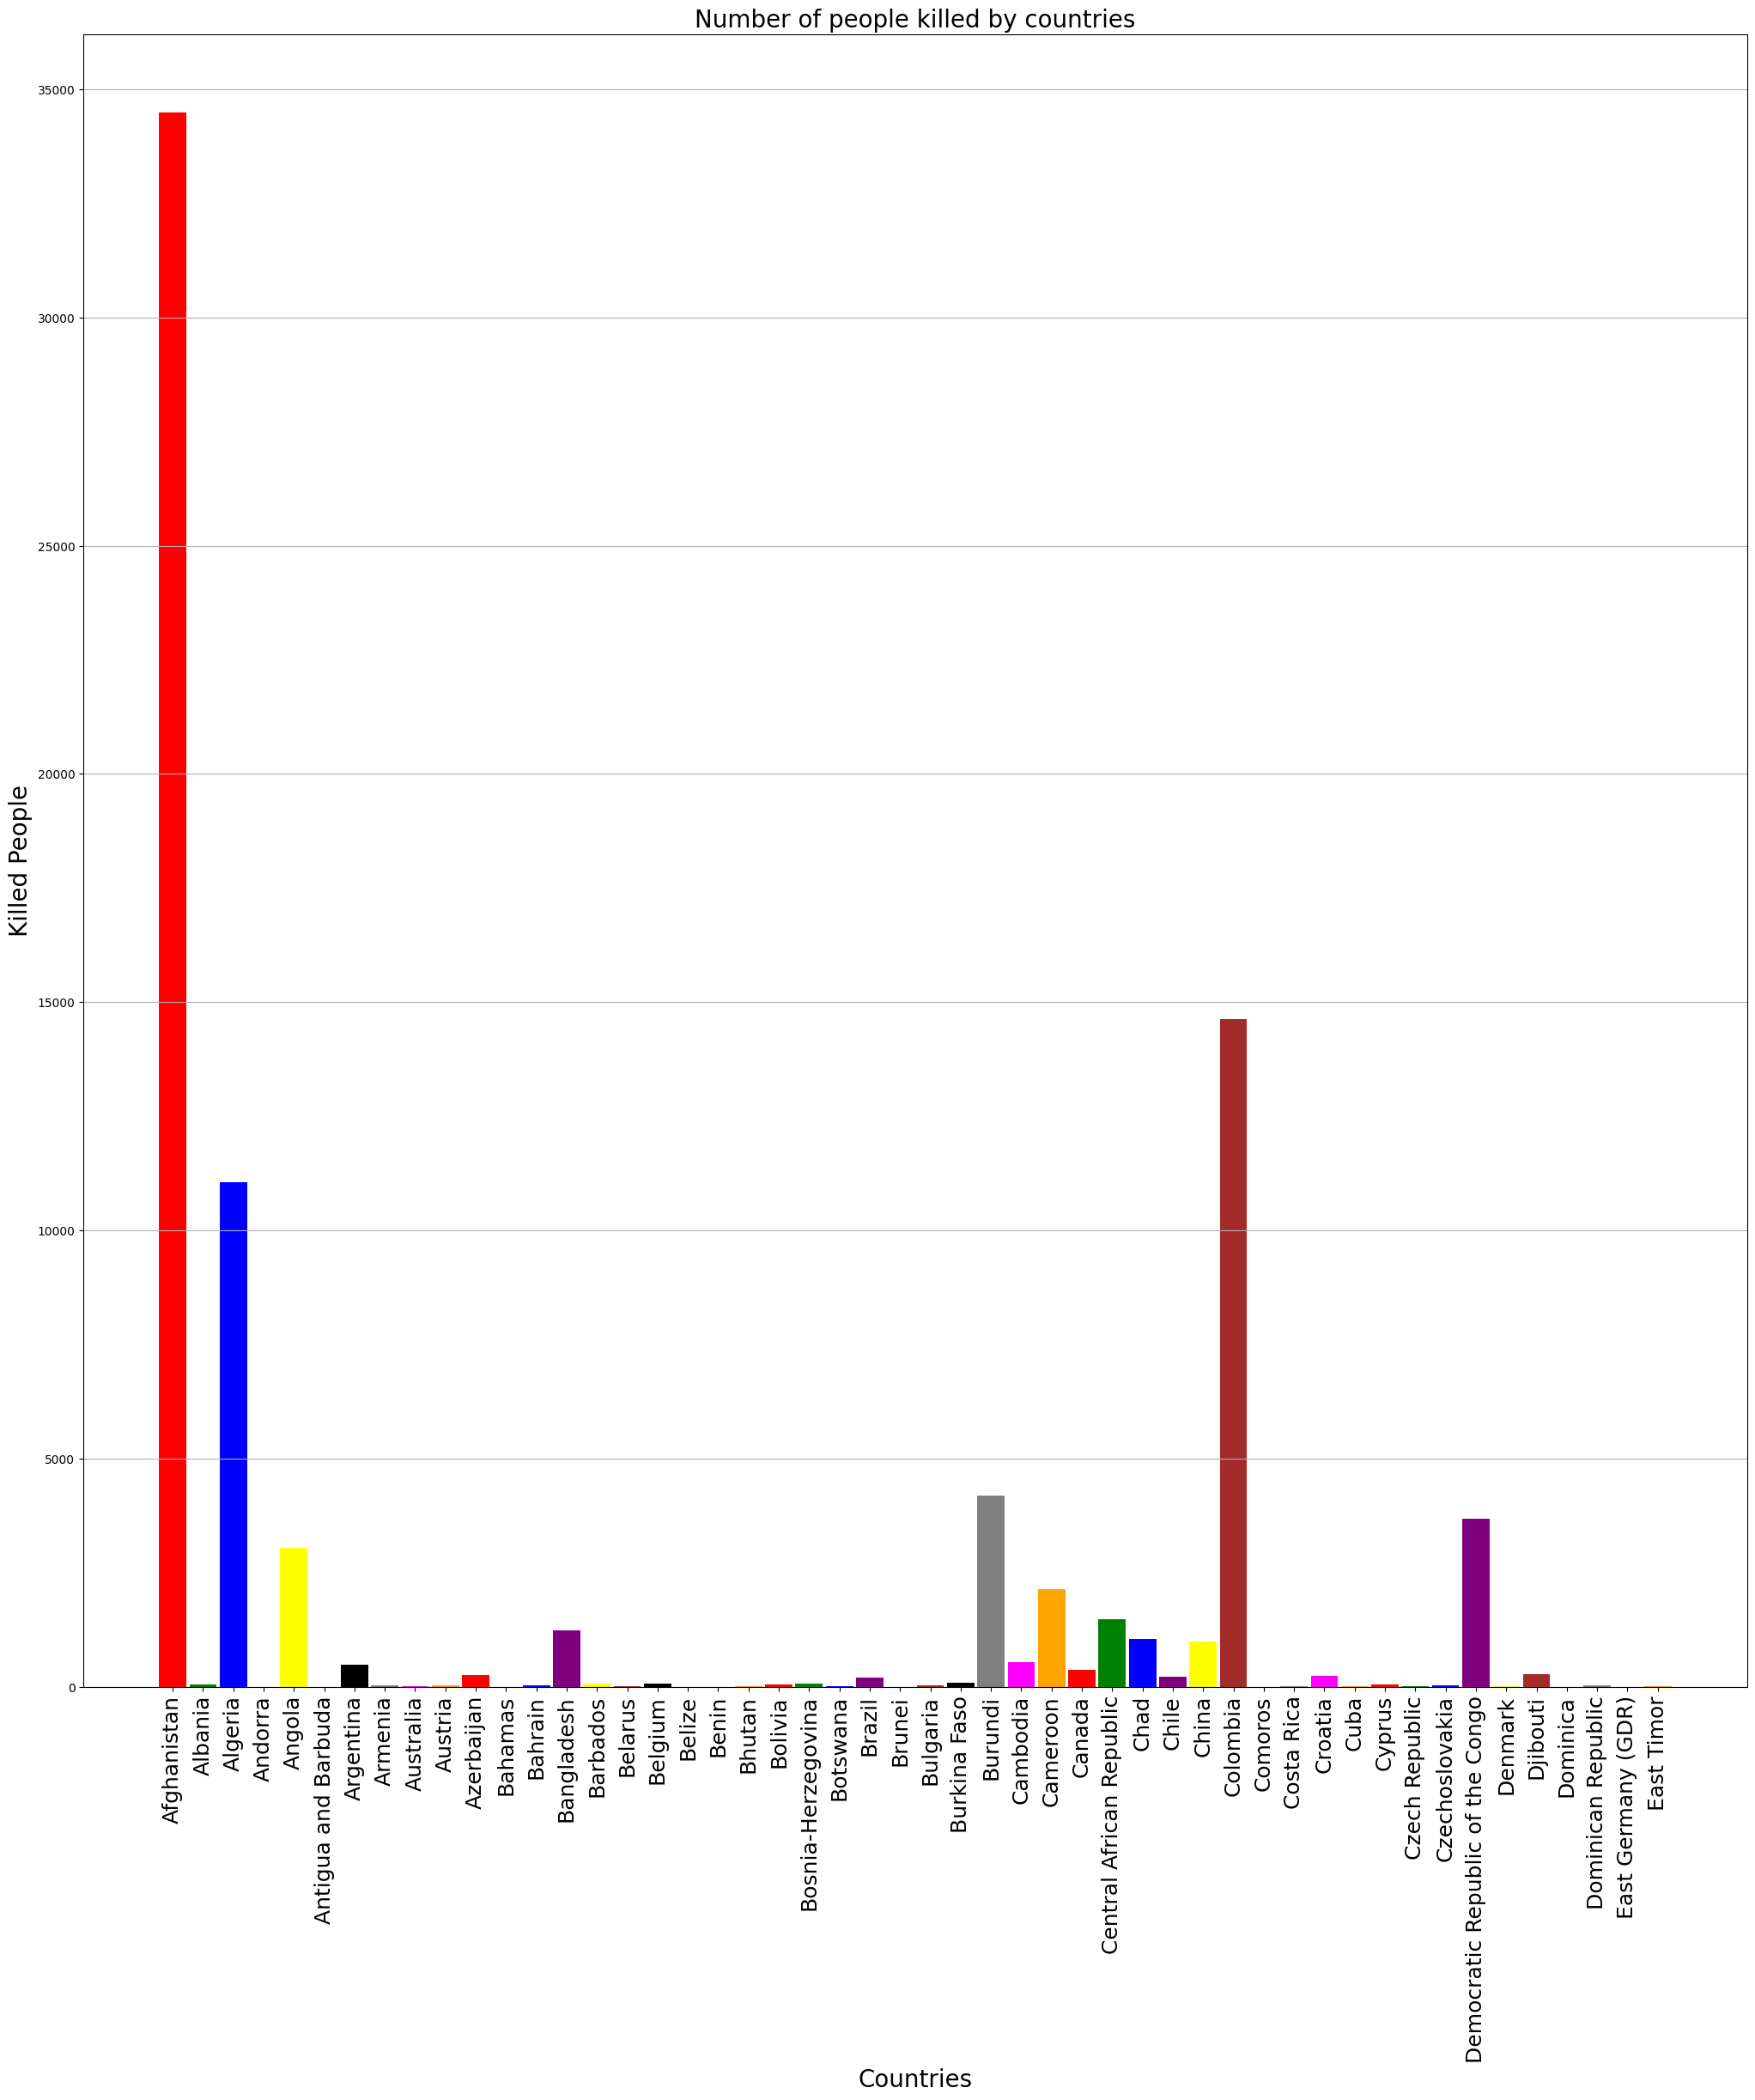

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

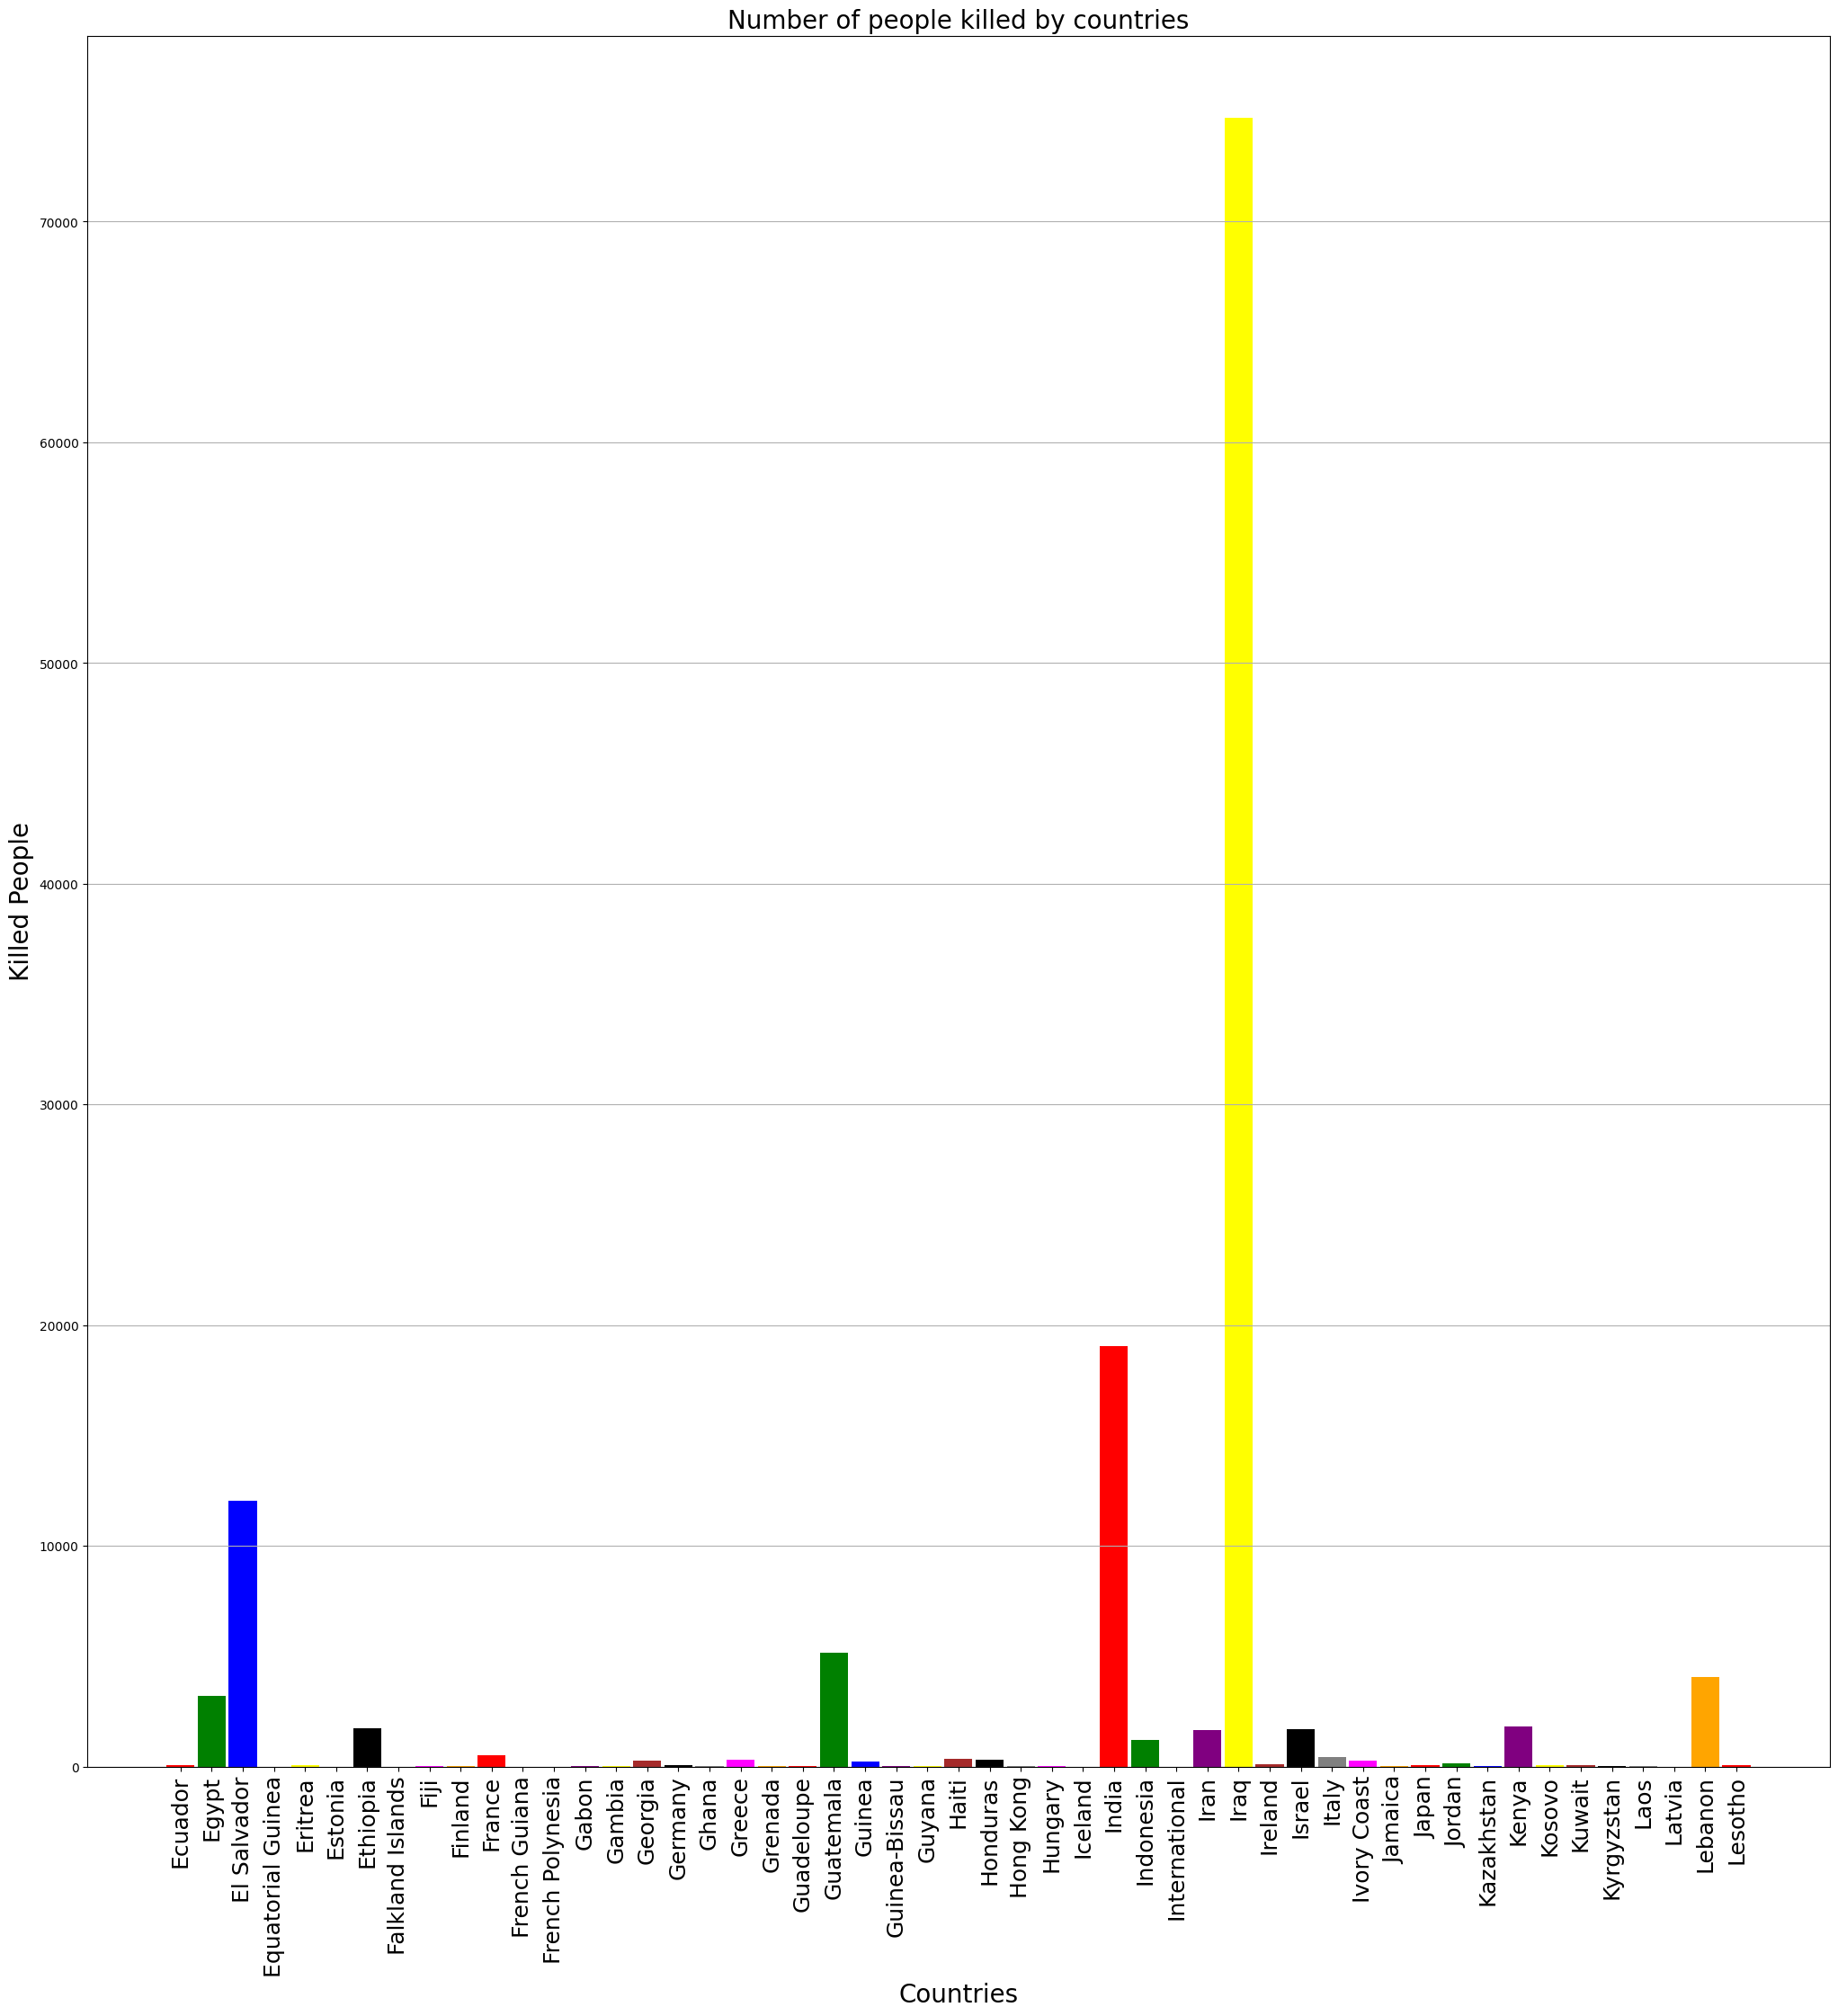

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

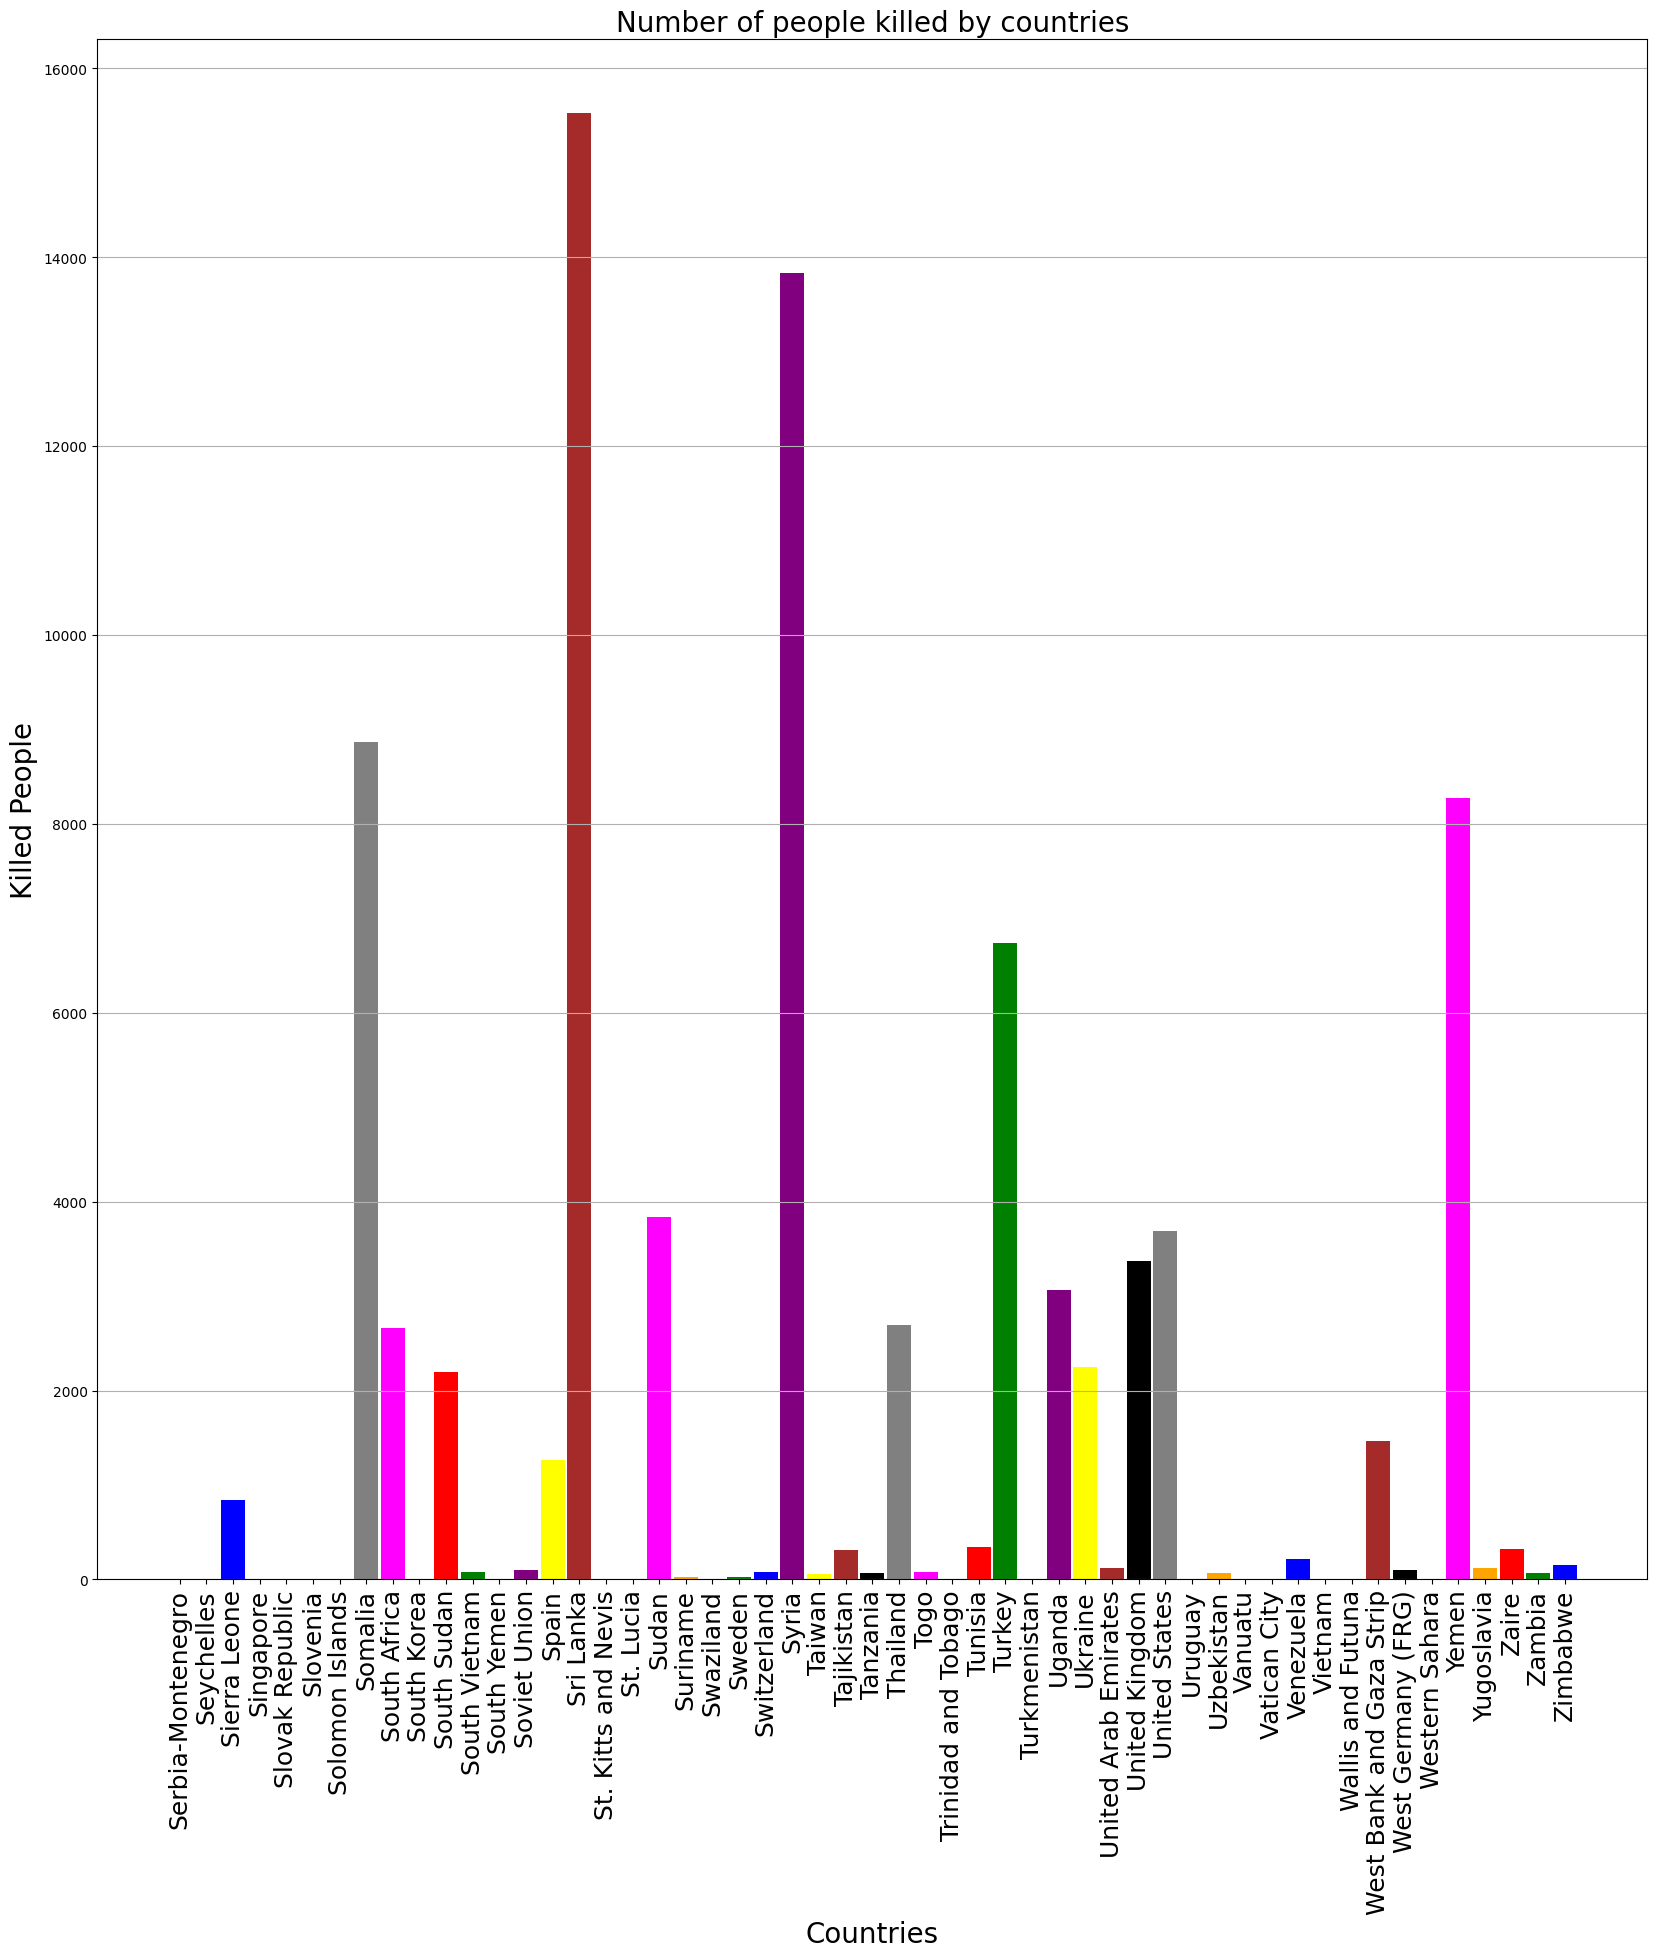

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.